<a href="https://colab.research.google.com/github/siddhartha-sai-17/Data-visualisation/blob/main/Dimensionality_Reduction(RFE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original Dataset Shape: (569, 30)

Accuracy using all features: 0.9766

Selected Features by RFE:
 ['mean radius', 'mean compactness', 'mean concavity', 'mean concave points', 'perimeter error', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry']


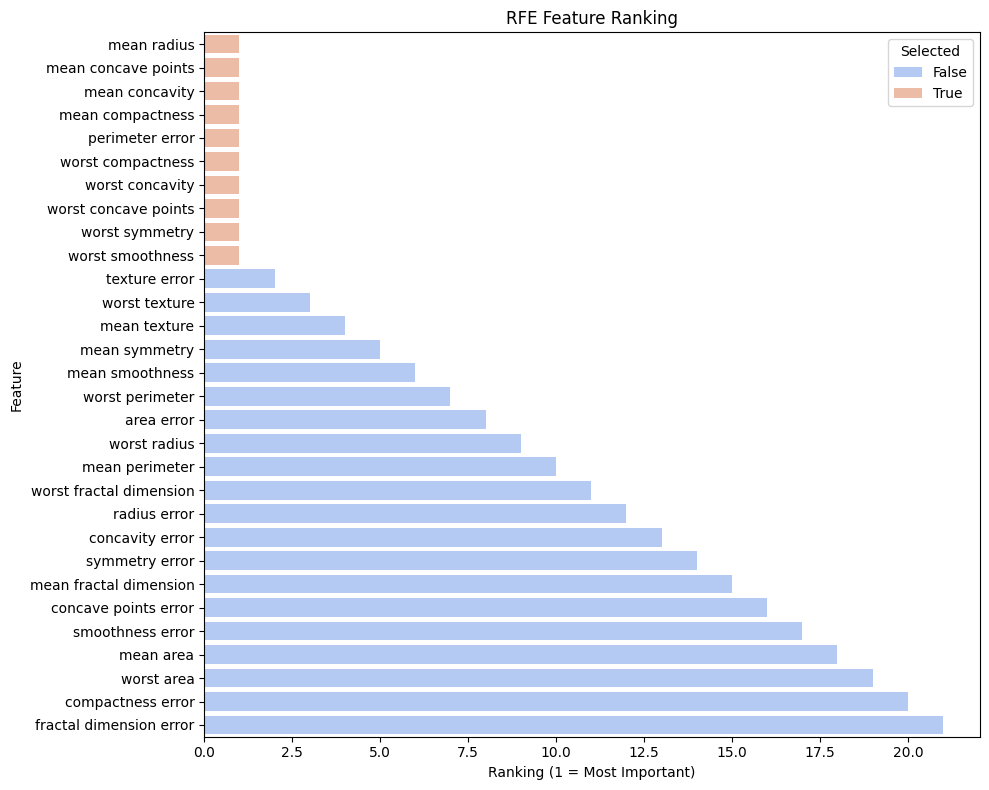


Accuracy using reduced features: 0.9415


In [ ]:
#Python code demonstrating dimensionality reduction using RFE (Recursive Feature Elimination) with a comparison of model performance before and after the reduction.
# Import libraries
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
print("Original Dataset Shape:", X.shape)


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model with all features
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)
y_pred_all = model.predict(X_test)

# Accuracy with all features
acc_all = accuracy_score(y_test, y_pred_all)
print("\nAccuracy using all features:", round(acc_all, 4))
# Apply RFE (select top 10 features)
rfe = RFE(estimator=LogisticRegression(max_iter=5000), n_features_to_select=10)
rfe.fit(X_train, y_train)
# Get reduced features
selected_features = X.columns[rfe.support_]
print("\nSelected Features by RFE:\n", selected_features.tolist())
# Train model using only selected features
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

model_rfe = LogisticRegression(max_iter=5000)
model_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = model_rfe.predict(X_test_rfe)

# Store rankings in a DataFrame
ranking_df = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_,
    'Selected': rfe.support_
})

# Sort by ranking (1 is best)
ranking_df_sorted = ranking_df.sort_values(by='Ranking', ascending=True)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(
    data=ranking_df_sorted,
    x='Ranking',
    y='Feature',
    palette='coolwarm',
    hue='Selected',
    dodge=False
)
plt.title('RFE Feature Ranking')
plt.xlabel('Ranking (1 = Most Important)')
plt.ylabel('Feature')
plt.legend(title='Selected')
plt.tight_layout()
plt.show()


# Accuracy after RFE
acc_rfe = accuracy_score(y_test, y_pred_rfe)
print("\nAccuracy using reduced features:", round(acc_rfe, 4))


In [ ]:
import pandas as pd
import numpy as np

# Create a sample DataFrame
data = {
    'Age': [25, 30, np.nan, 45, 35, 40, np.nan, 50],
    'Income': [40000, 50000, 45000, 52000, np.nan, 61000, 58000, 60000],
    'Score': [70, 80, 75, np.nan, 90, 85, 60, 95]
}
df = pd.DataFrame(data)
print("Original Data:\n", df)

# Check for null values
print("\nNull values:\n", df.isnull().sum())

# Drop rows with any null value (optional)
df_dropped = df.dropna()
print("\nAfter dropping rows with null values:\n", df_dropped)
print("\n Original data frame:\n",df)

# Fill missing values with column mean
df_filled = df.fillna(df.mean(numeric_only=True))
print("\nAfter filling missing values with mean:\n", df_filled)

def min_max_normalize(column):
    return (column - column.min()) / (column.max() - column.min())

df_filled['Income_MinMax'] = min_max_normalize(df_filled['Income'])
def z_score_normalize(column):
    return (column - column.mean()) / column.std()

df_filled['Income_ZScore'] = z_score_normalize(df_filled['Income'])

print("\nFinal Cleaned and Transformed Data (Z_score):\n",df_filled)

def decimal_scaling(column):
    j = len(str(int(column.abs().max())))
    return column / (10 ** j)

df_filled['Income_DecimalScaled'] = decimal_scaling(df_filled['Income'])

print("\nFinal Cleaned and Transformed Data:\n", df_filled)

# Calculate Covariance between Age and Score
covariance = df_filled[['Age', 'Score']].cov().iloc[0, 1]
print(f"\nCovariance between Age and Score: {covariance:.2f}")

# Calculate Pearson Correlation between Age and Score
correlation = df_filled[['Age', 'Score']].corr(method='pearson').iloc[0, 1]
print(f"Pearson Correlation between Age and Score: {correlation:.2f}")

# -------------------------
# 1. Equal-frequency binning on 'Age' column
# -------------------------
print("\n--- Equal-frequency binning ---")
df_filled['Age_bin_eq_freq'] = pd.qcut(df_filled['Age'], q=3, labels=["Low", "Medium", "High"])
print(df_filled[['Age', 'Age_bin_eq_freq']])

# Binning by mean
age_bins = pd.qcut(df_filled['Age'], q=3)
df_filled['Age_bin_by_mean'] = df_filled['Age'].groupby(age_bins).transform('mean')
print("\nBinning by Mean:\n", df_filled[['Age', 'Age_bin_by_mean']])

# Binning by boundary — corrected
def bin_by_boundary(values, intervals):
    binned_values = []
    for val in values:
        for interval in intervals:
            if interval.left <= val <= interval.right:
                # Choose the closer boundary
                left_diff = abs(val - interval.left)
                right_diff = abs(val - interval.right)
                boundary = interval.left if left_diff < right_diff else interval.right
                binned_values.append(round(boundary))
                break
    return binned_values

# Extract the actual bin intervals
age_intervals = age_bins.cat.categories
df_filled['Age_bin_by_boundary'] = bin_by_boundary(df_filled['Age'], age_intervals)

print("\nBinning by Boundary:\n", df_filled[['Age', 'Age_bin_by_boundary']])


Original Data:
     Age   Income  Score
0  25.0  40000.0   70.0
1  30.0  50000.0   80.0
2   NaN  45000.0   75.0
3  45.0  52000.0    NaN
4  35.0      NaN   90.0
5  40.0  61000.0   85.0
6   NaN  58000.0   60.0
7  50.0  60000.0   95.0

Null values:
 Age       2
Income    1
Score     1
dtype: int64

After dropping rows with null values:
     Age   Income  Score
0  25.0  40000.0   70.0
1  30.0  50000.0   80.0
5  40.0  61000.0   85.0
7  50.0  60000.0   95.0

 Original data frame:
     Age   Income  Score
0  25.0  40000.0   70.0
1  30.0  50000.0   80.0
2   NaN  45000.0   75.0
3  45.0  52000.0    NaN
4  35.0      NaN   90.0
5  40.0  61000.0   85.0
6   NaN  58000.0   60.0
7  50.0  60000.0   95.0

After filling missing values with mean:
     Age        Income      Score
0  25.0  40000.000000  70.000000
1  30.0  50000.000000  80.000000
2  37.5  45000.000000  75.000000
3  45.0  52000.000000  79.285714
4  35.0  52285.714286  90.000000
5  40.0  61000.000000  85.000000
6  37.5  58000.000000  60.00000

/tmp/ipython-input-2-3812807413.py:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_filled['Age_bin_by_mean'] = df_filled['Age'].groupby(age_bins).transform('mean')
